<a href="https://colab.research.google.com/github/sinyoung0110/DeepLearning_2024_2/blob/main/3(%ED%99%9C%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST 데이터셋을 활용한 분류예측 모델 + 시각화

In [3]:
# 필요한 라이브러리 불러오기
import tensorflow as tf                              # 딥러닝을 위한 TensorFlow 라이브러리
import matplotlib.pyplot as plt                      # 데이터 시각화용 matplotlib
import numpy as np                                   # 배열 및 수치 계산을 위한 numpy (사용하지 않는 경우 이 줄은 생략 가능)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# 데이터 불러오기 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()     # MNIST 데이터셋을 내려받아 훈련 및 테스트 세트로 분할


In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


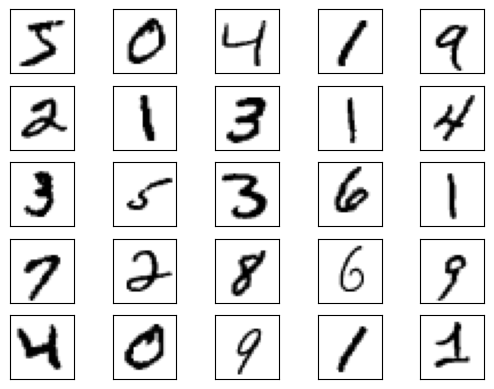

In [4]:
# 분류에 사용할 클래스 이름 설정
class_names = ['0','1','2','3','4','5','6','7','8','9']

# 훈련 데이터 이미지 일부를 출력 (5x5 그리드로 25개)
for i in range(25):
    plt.subplot(5, 5, i+1)                           # 5x5 그리드로 이미지 출력
    plt.grid(False)                                  # 그리드를 비활성화하여 시각적으로 깔끔하게 표시
    plt.xticks([])                                   # x축 눈금 제거
    plt.yticks([])                                   # y축 눈금 제거
    plt.imshow(x_train[i], cmap=plt.cm.binary)       # 흑백 이미지로 표시 (binary 색상맵)
plt.show()

In [ ]:
# 데이터 불러오기 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()     # MNIST 데이터셋을 내려받아 훈련 및 테스트 세트로 분할
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0             # 이미지 데이터를 28x28x1 모양으로 변경하고 0-1 사이 값으로 정규화
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)  # 레이블을 원-핫 인코딩 (0부터 9까지 10개 클래스)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
# CNN 모델 구성
model = Sequential()                                          # Sequential API로 모델 생성
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Conv2D: 32개의 필터를 사용한 합성곱 층, 3x3 크기의 필터, ReLU 활성화 함수 사용
    # input_shape: 28x28 크기의 흑백 이미지 입력 (채널 수=1)
model.add(MaxPooling2D((2, 2)))
    # MaxPooling2D: (2, 2) 풀링 창으로 이미지 크기를 절반으로 줄이며 중요한 특징을 추출

model.add(Conv2D(64, (3, 3), activation='relu'))
    # Conv2D: 64개의 필터를 사용해 더 많은 특징을 추출
model.add(MaxPooling2D((2, 2)))
    # MaxPooling2D: 또다시 풀링으로 크기를 줄임

model.add(Flatten())                                         # Flatten: 2차원 데이터를 1차원으로 변환해 완전 연결층(Dense)에 입력할 수 있게 함
model.add(Dense(64, activation='relu'))                      # Dense: 64개의 뉴런을 가진 완전 연결층
model.add(Dense(10, activation='softmax'))                   # 출력층 (10개의 뉴런으로, 10개 클래스의 확률을 출력)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',               # 다중 클래스 분류 문제에 적합한 손실 함수
              metrics=['accuracy'])                          # 모델 성능 지표로 정확도(accuracy) 설정

# 모델 학습
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))
    # fit: 배치 크기 64로, 10회 반복 학습 수행
    # validation_data: 학습 과정 중 테스트 세트로 검증

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test)              # 테스트 세트를 사용하여 모델 성능 평가
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)                            # 평가 결과 출력


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.8750 - loss: 0.4037 - val_accuracy: 0.9821 - val_loss: 0.0552
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.9819 - loss: 0.0576 - val_accuracy: 0.9885 - val_loss: 0.0344
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9881 - loss: 0.0387 - val_accuracy: 0.9880 - val_loss: 0.0329
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9921 - loss: 0.0263 - val_accuracy: 0.9898 - val_loss: 0.0300
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9933 - loss: 0.0214 - val_accuracy: 0.9903 - val_loss: 0.0286
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.9953 - loss: 0.0154 - val_accuracy: 0.9896 - val_loss: 0.0300
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 55ms/step - accuracy: 0.9960 - loss: 0.0125 - val_accuracy: 0.9912 - val_loss: 0.0305
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9967 - loss: 0.0100 - 

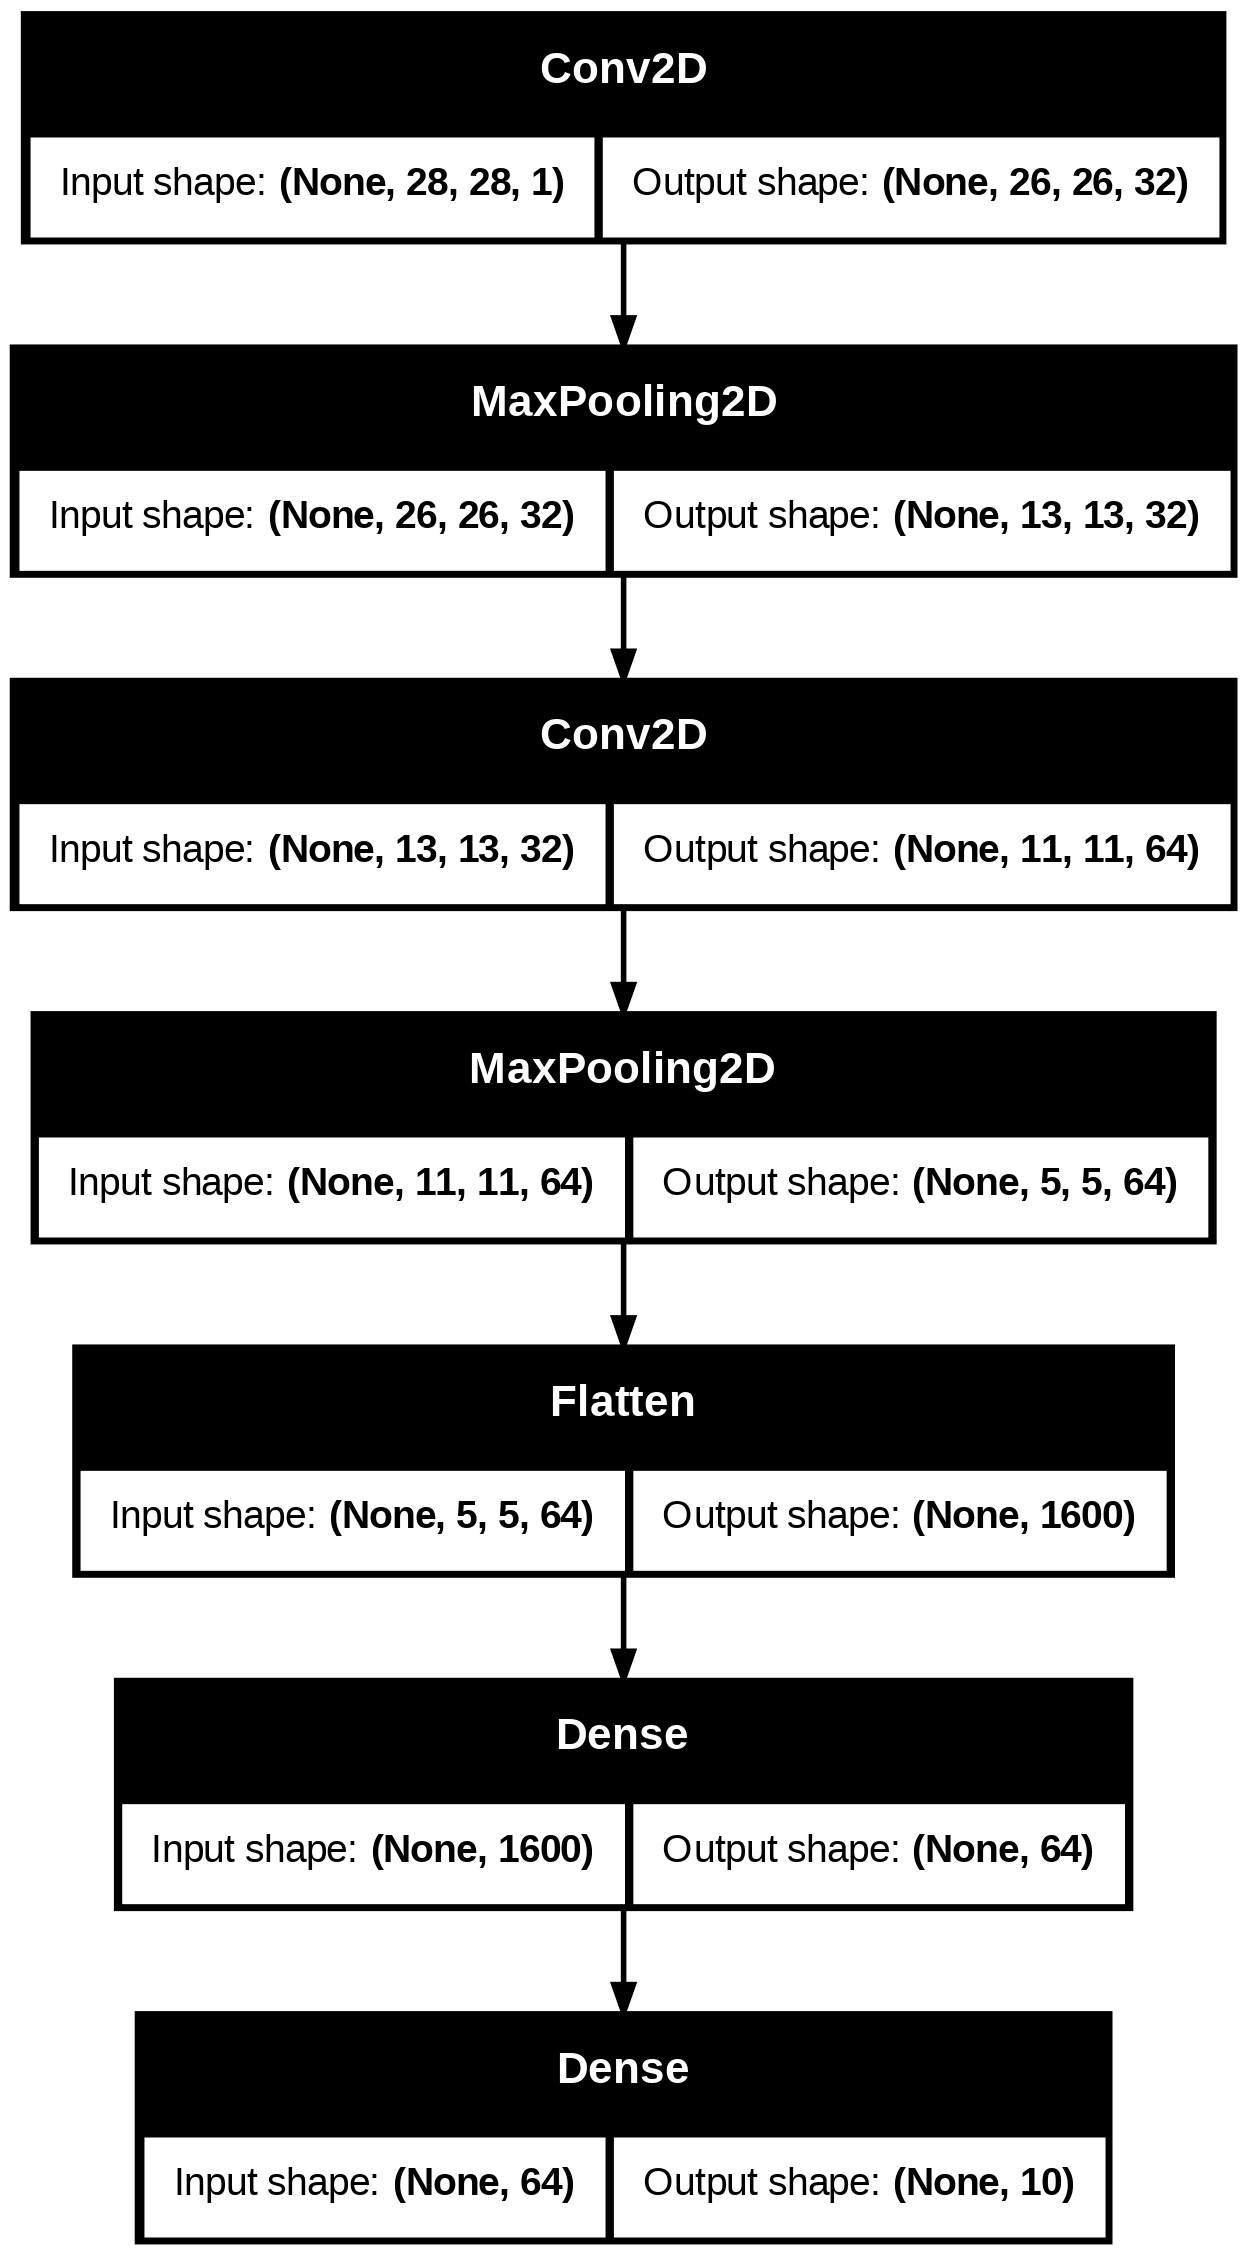

In [9]:
from keras import layers, models
from keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='pre_model.png')